In [1]:

!ls $root_dir -ln | wc -l

13


20


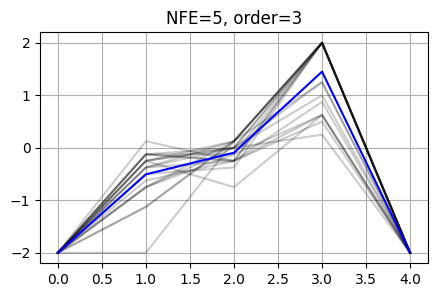

20


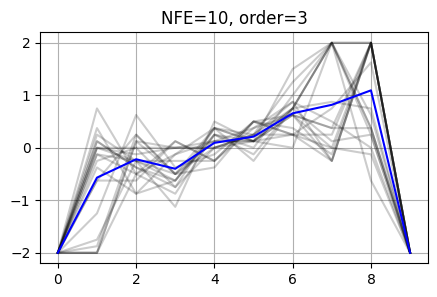

20


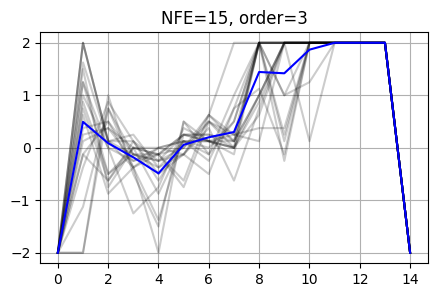

20


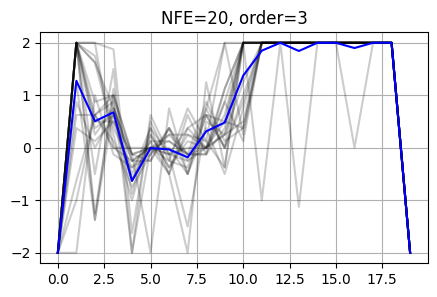

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

#for scale in [2.0, 4.0, 6.0, 8.0]:
for scale in [8.0]:
    #for NFE in [5, 10, 15, 20]:
    for NFE in [5, 10, 15, 20]:
        #for order in [2, 3]:
        for order in [3]:
            root_dir = f'/data/guided-diffusion/scale/rbf_ecp_marginal{scale}_128'
            optimal_log_scales_list = []
            plt.figure(figsize=[5, 3])
            plt.title(f"NFE={NFE}, order={order}")
            for number in range(100):
                npz_file = os.path.join(root_dir, f'NFE={NFE},p={order},number={number}.npz')
                if not os.path.exists(npz_file):
                    continue
                data = np.load(npz_file)
                plt.plot(data['optimal_log_scales'][0], color='black', alpha=0.2)
                optimal_log_scales_list.append(data['optimal_log_scales'])
            optimal_log_scales = np.stack(optimal_log_scales_list, axis=0)
            print(len(optimal_log_scales))
            optimal_log_scales = np.mean(optimal_log_scales, axis=0)
            save_file = os.path.join(root_dir, f'NFE={NFE},p={order}.npz')
            np.savez(save_file, optimal_log_scales=optimal_log_scales)
            data = np.load(save_file)
            plt.plot(data['optimal_log_scales'][0], color='blue')
            plt.grid()
            plt.show()
            


In [71]:
optimal_log_scales_list

[]